In [1]:
!pip install wordcloud

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("BBC News.csv")

In [4]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Understanding Features and Target Variables

In [5]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [6]:
data.shape

(1490, 3)

In [7]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Checking for NULL values

In [8]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

# Countplot of Target Variable(Category)

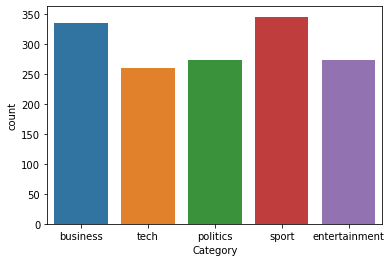

In [9]:
sns.countplot(data.Category)

In [10]:
# EDA
# number of words in news article
data['News_length'] = data['Text'].str.len()
print(data['News_length'])

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64


# Distribution Plot

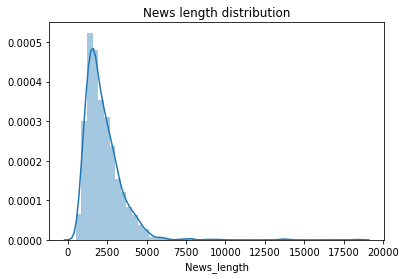

In [11]:
sns.distplot(data['News_length']).set_title('News length distribution');


# WordCloud

In [16]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)  # paragraph
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

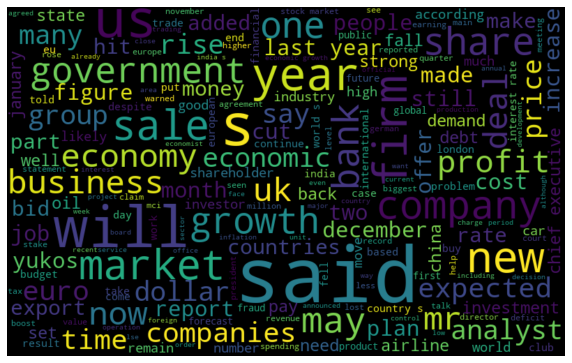

In [17]:
subset=data[data.Category=="business"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

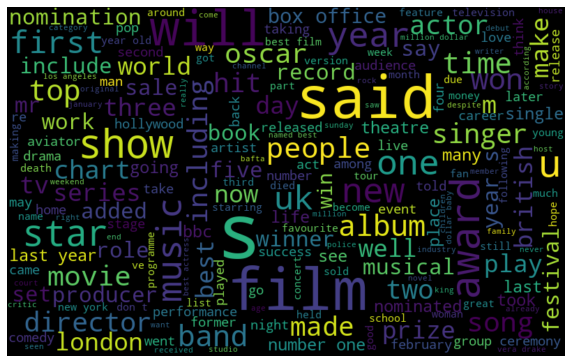

In [18]:
subset=data[data.Category=="entertainment"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

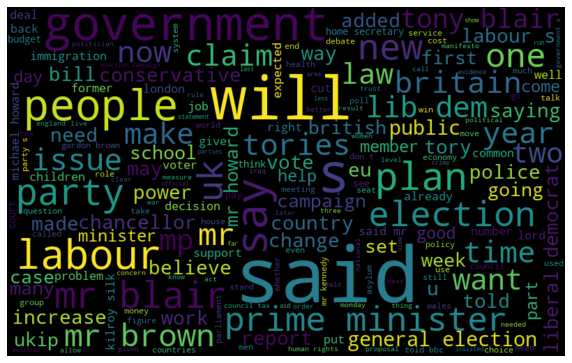

In [19]:
subset=data[data.Category=="politics"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

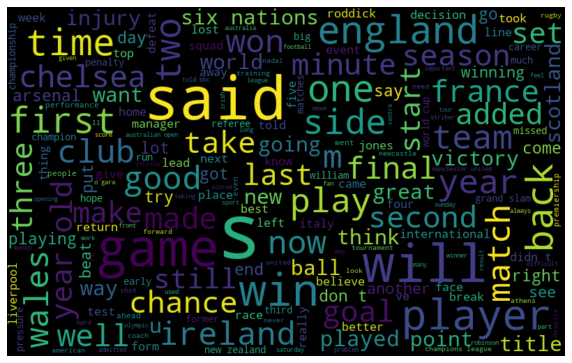

In [20]:
subset=data[data.Category=="sport"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

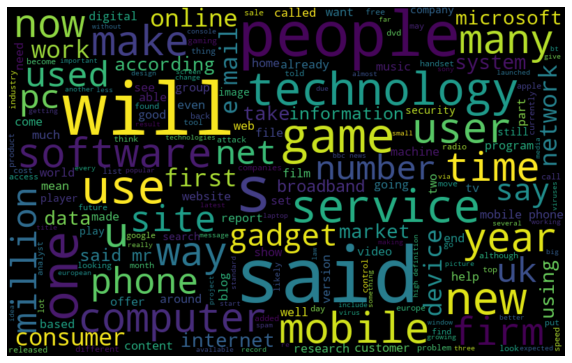

In [21]:
subset=data[data.Category=="tech"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

Removing the special characters<br>
1) \r<br>
2) \n<br>

Removing Punctuations and Stopwords

In [22]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)   # remove multiple spaces
    text = re.sub(r'[^\w\s]','',text) # remove punctuations
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
#     filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [23]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [24]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# Label Encoding

In [25]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['Category']) 

In [27]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [28]:
data.to_csv('BBC_News_processed.csv')

# Split the data in Training and testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [31]:
X_train.shape
X_test.shape

(298,)

In [32]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [33]:
# To converttext into numerical format
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)





[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05529176 0.         0.07204649 ... 0.03992422 0.08217012 0.07079346]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(298, 300)


# Building Model

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9194630872483222
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       0.94      0.94      0.94        47
           2       0.89      0.85      0.87        55
           3       0.96      0.98      0.97        65
           4       0.88      0.96      0.92        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [82]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [83]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.6min finished


In [52]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [80]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9295302013422819
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        76
           1       0.94      0.94      0.94        47
           2       0.91      0.87      0.89        55
           3       0.95      0.97      0.96        65
           4       0.90      0.96      0.93        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



# Logistic Regression

In [54]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# Hyper Parameter Tuning (Logistic Regression)

In [55]:
param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


{'C': 1, 'penalty': 'l2'}

In [57]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# KNeighborsClassifier

Accuracy remains the same after hyper paramter tuning

In [107]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.912751677852349
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       1.00      0.89      0.94        47
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        65
           4       0.84      0.96      0.90        55

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



In [108]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyper Paramaters Tuning (KNeighborsClassifier)

In [109]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.0s finished


In [110]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [112]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9161073825503355
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       1.00      0.89      0.94        47
           2       0.88      0.91      0.89        55
           3       0.97      0.95      0.96        65
           4       0.83      0.96      0.89        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



# Decision Tree

In [99]:
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7919463087248322
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        76
           1       0.84      0.89      0.87        47
           2       0.78      0.64      0.70        55
           3       0.79      0.92      0.85        65
           4       0.84      0.76      0.80        55

    accuracy                           0.79       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298



In [100]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

# Hyper Paramter Tuning (Decision Tree)

In [101]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


In [104]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}

In [105]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7416107382550335
              precision    recall  f1-score   support

           0       0.67      0.66      0.66        76
           1       0.70      0.85      0.77        47
           2       0.73      0.69      0.71        55
           3       0.84      0.78      0.81        65
           4       0.79      0.76      0.78        55

    accuracy                           0.74       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.74      0.74      0.74       298



# GaussianNB

In [106]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8825503355704698
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.89      0.89      0.89        47
           2       0.90      0.84      0.87        55
           3       0.95      0.95      0.95        65
           4       0.81      0.91      0.85        55

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.88      0.88      0.88       298



# Doc2Vec

In [71]:
bbc = pd.DataFrame()

In [72]:
bbc['Text'] = data['Text_parsed']

In [73]:
bbc['Category'] = data['Category_target']

In [74]:
bbc.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses 168m payout eighteen former enron...,0


In [75]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(bbc.Text, bbc.Category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [76]:
all_data[0:2]

[TaggedDocument(words=['solskjaer', 'raises', 'hopes', 'return', 'manchester', 'united', 'striker', 'ole', 'gunnar', 'solskjaer', 'said', 'hoped', 'return', 'next', 'season', 'following', 'careerthreatening', 'injury', 'right', 'knee', '31yearold', 'norway', 'international', 'surgery', 'sweden', 'august', 'transplant', 'cartilage', 'joint', 'doubt', 'play', 'solskjaer', 'told', 'aftenposten', 'daily', 'problem', 'speed', 'talking', 'eight', 'months', 'time', 'going', 'knee', 'slavishly', 'following', 'programme', 'solskjaer', 'last', 'played', 'united', 'late', 'substitute', 'may', 'fa', 'cup', 'final', 'win', 'millwall', 'contract', 'united', 'runs', '2006', 'time', 'premier', 'league', 'club', '10', 'years'], tags=['Train_0']),
 TaggedDocument(words=['microsoft', 'releases', 'bumper', 'patches', 'microsoft', 'warned', 'pc', 'users', 'update', 'systems', 'latest', 'security', 'fixes', 'flaws', 'windows', 'programs', 'monthly', 'security', 'bulletin', 'flagged', 'eight', 'critical', 's

In [77]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 1490/1490 [00:00<00:00, 1493669.45it/s]


In [78]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

# Logistic Regression

In [89]:
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9664429530201343
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       103
           1       0.94      0.99      0.96        89
           2       0.96      0.91      0.94        81
           3       1.00      0.97      0.98        97
           4       0.99      0.97      0.98        77

    accuracy                           0.97       447
   macro avg       0.97      0.97      0.97       447
weighted avg       0.97      0.97      0.97       447



In [125]:
model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9642058165548099
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       103
           1       0.96      0.96      0.96        89
           2       0.94      0.95      0.94        81
           3       0.99      0.97      0.98        97
           4       0.95      0.99      0.97        77

    accuracy                           0.96       447
   macro avg       0.96      0.96      0.96       447
weighted avg       0.96      0.96      0.96       447



# Random Forest

In [94]:
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8344519015659956
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       103
           1       0.89      0.81      0.85        89
           2       0.86      0.75      0.80        81
           3       0.81      0.95      0.87        97
           4       0.90      0.68      0.77        77

    accuracy                           0.83       447
   macro avg       0.85      0.82      0.83       447
weighted avg       0.84      0.83      0.83       447



# Hyper Parameter Tuning (Random Forest)

In [96]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.7min finished


In [97]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [98]:
model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9194630872483222
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       103
           1       0.96      0.89      0.92        89
           2       0.93      0.85      0.89        81
           3       0.90      0.98      0.94        97
           4       0.99      0.87      0.92        77

    accuracy                           0.92       447
   macro avg       0.93      0.91      0.92       447
weighted avg       0.92      0.92      0.92       447



# Decision Tree

In [92]:
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.43847874720357943
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       103
           1       0.49      0.48      0.49        89
           2       0.41      0.36      0.38        81
           3       0.46      0.47      0.47        97
           4       0.34      0.42      0.37        77

    accuracy                           0.44       447
   macro avg       0.44      0.44      0.44       447
weighted avg       0.44      0.44      0.44       447



# Hyper Parameter Tuning (Decision Tree)

In [119]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.0s finished


In [120]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 7}

In [123]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=7)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.44742729306487694
              precision    recall  f1-score   support

           0       0.58      0.37      0.45       103
           1       0.45      0.51      0.48        89
           2       0.38      0.37      0.38        81
           3       0.45      0.53      0.48        97
           4       0.41      0.47      0.44        77

    accuracy                           0.45       447
   macro avg       0.45      0.45      0.44       447
weighted avg       0.46      0.45      0.45       447



# KNeighborsClassifier

In [113]:
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8344519015659956
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       103
           1       0.98      0.73      0.84        89
           2       0.78      0.84      0.81        81
           3       0.71      0.98      0.82        97
           4       0.85      0.83      0.84        77

    accuracy                           0.83       447
   macro avg       0.86      0.83      0.83       447
weighted avg       0.86      0.83      0.84       447



# Hyper Parameter Tuning (KNeighborsClassifier)

In [114]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   11.2s finished


In [116]:
bestF.best_params_

{'n_neighbors': 6, 'p': 2}

In [118]:
model = KNeighborsClassifier(n_neighbors=6,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8456375838926175
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       103
           1       0.98      0.72      0.83        89
           2       0.85      0.85      0.85        81
           3       0.70      0.99      0.82        97
           4       0.89      0.88      0.89        77

    accuracy                           0.85       447
   macro avg       0.87      0.85      0.85       447
weighted avg       0.87      0.85      0.85       447

